In [84]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [85]:
X_train = pd.read_csv('dataset/X_train.csv',delim_whitespace=True)
y_train = pd.read_csv('dataset/y_train.csv', names=['class_label'])
X_test = pd.read_csv('dataset/X_test.csv',delim_whitespace=True)
y_test = pd.read_csv('dataset/y_test.csv', names=['class_label'])

In [86]:
print('The shape of X_train is:',X_train.shape)
print('The shape of y_train is:',y_train.shape)
print('The shape of X_test is:',X_test.shape)
print('The shape of y_test is:',y_test.shape)

The shape of X_train is: (1668, 9635)
The shape of y_train is: (1668, 1)
The shape of X_test is: (557, 9635)
The shape of y_test is: (557, 1)


In [87]:
train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)
train_data.head()

,ad,sale,boost,time,warner,profit,quarterli,media,giant,jump,...,denialofservic,ddo,seagrav,bot,wirelessli,streamcast,peripher,headphon,flavour,class_label
0,1,1,0,0,0,0,0,4,1,0,...,0,0,0,0,0,0,0,0,0,4
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [88]:
print('The shape of train_data is:',train_data.shape)
print('The shape of test_data is:',test_data.shape)

The shape of train_data is: (1668, 9636)
The shape of test_data is: (557, 9636)


In [89]:
#class label counts
train_list = list(train_data.class_label.value_counts().sort_index())
test_list = list(test_data.class_label.value_counts().sort_index())
print(train_list)
print(test_list)

[375, 284, 319, 377, 313]
[135, 102, 98, 134, 88]


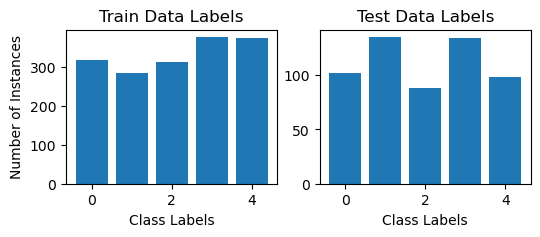

In [90]:
# Get the class labels and their counts for train data
train_class_labels = train_data.class_label.unique()
train_class_counts = train_data.class_label.value_counts().sort_index()

# Get the class labels and their counts for test data
test_class_labels = test_data.class_label.unique()
test_class_counts = test_data.class_label.value_counts().sort_index()

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 2))

# Plot train data on first subplot
ax1.bar(train_class_labels, train_class_counts)
ax1.set_xlabel('Class Labels')
ax1.set_ylabel('Number of Instances')
ax1.set_title('Train Data Labels')

# Plot test data on second subplot
ax2.bar(test_class_labels, test_class_counts)
ax2.set_xlabel('Class Labels')
ax2.set_title('Test Data Labels')

# Show the plot
plt.show()

In [91]:
print('In Training Data')
for i in range(5):
    print("The Percentage of Documents belongs to Label",i,"is: ",round(train_list[i]/(sum(train_list))*10000)/100,"%")

print("\n")
print('In Validation Data')
for i in range(5):
    print("The Percentage of Documents belongs to Label",i,"is: ",round(test_list[i]/(sum(test_list))*10000)/100,"%")


In Training Data
The Percentage of Documents belongs to Label 0 is:  22.48 %
The Percentage of Documents belongs to Label 1 is:  17.03 %
The Percentage of Documents belongs to Label 2 is:  19.12 %
The Percentage of Documents belongs to Label 3 is:  22.6 %
The Percentage of Documents belongs to Label 4 is:  18.76 %


In Validation Data
The Percentage of Documents belongs to Label 0 is:  24.24 %
The Percentage of Documents belongs to Label 1 is:  18.31 %
The Percentage of Documents belongs to Label 2 is:  17.59 %
The Percentage of Documents belongs to Label 3 is:  24.06 %
The Percentage of Documents belongs to Label 4 is:  15.8 %


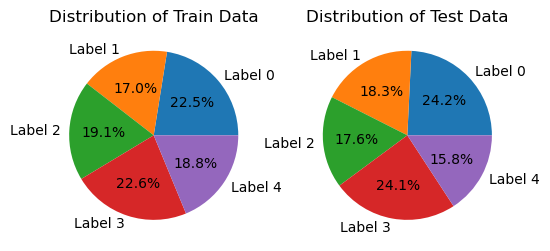

In [92]:
# Get the class labels and their counts for train data
train_class_labels = ['Label 0', 'Label 1', 'Label 2', 'Label 3', 'Label 4']
train_class_counts = train_list

# Get the class labels and their counts for test data
test_class_labels = ['Label 0', 'Label 1', 'Label 2', 'Label 3', 'Label 4']
test_class_counts = test_list

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 3))

# Plot train data on first subplot
ax1.pie(train_class_counts, labels=train_class_labels, autopct='%1.1f%%')
ax1.set_title('Distribution of Train Data')

# Plot test data on second subplot
ax2.pie(test_class_counts, labels=test_class_labels, autopct='%1.1f%%')
ax2.set_title('Distribution of Test Data')

# Show the plot
plt.show()

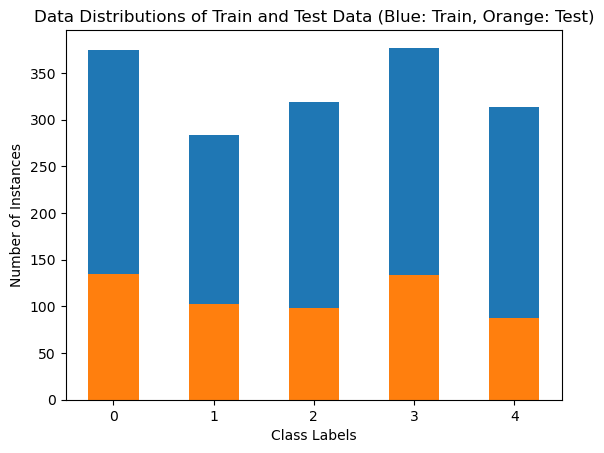

In [143]:
#plotting train and test data distribution to check if they are similar
fig, ax = plt.subplots(1, 1)
bins = np.linspace(train_data.iloc[:,-1].values.min() - .25, train_data.iloc[:,-1].values.max() + .25, 10)
ax.hist(train_data.iloc[:,-1].values,bins=bins)
ax.hist(test_data.iloc[:,-1].values,bins=bins)
ax.set_title("Data Distributions of Train and Test Data (Blue: Train, Orange: Test)")
ax.set_xlabel('Class Labels')
ax.set_ylabel('Number of Instances')
plt.show()

In [94]:
#splitting data into features and labels for train and test data as numpy arrays
x_train = train_data.iloc[:,:-1].values
x_test = test_data.iloc[:,:-1].values
y_train = train_data.iloc[:,-1].values
y_test =  test_data.iloc[:,-1].values

#splitting data into features and labels for train and test data as pandas dataframes
X_train = train_data.drop('class_label', axis=1)
X_test = test_data.drop('class_label', axis=1)
Y_train = train_data['class_label']
Y_test =  test_data['class_label']

print("x_train shape: "+ str(np.shape(x_train)))
print("x_test shape: "+ str(np.shape(x_test)))
print("y_train shape: "+ str(np.shape(y_train)))
print("y_test shape: "+ str(np.shape(y_test)))


x_train shape: (1668, 9635)
x_test shape: (557, 9635)
y_train shape: (1668,)
y_test shape: (557,)


In [95]:
summ_alien=0
summ_thunder=0
all_tech_words=0
for row_index in range(len(train_data['alien'])):
    if train_data['class_label'][row_index] == 4:
        all_tech_words += train_data.iloc[row_index].sum()
        summ_alien += train_data['alien'][row_index] + train_data['thunder'][row_index]
        summ_thunder += train_data['thunder'][row_index]
        if train_data['alien'][row_index] + train_data['thunder'][row_index] > 0:
            print(row_index)
            
print("\n")
print('Number of alien words in tech label: ',summ_alien)
print('Number of thunder words in tech label: ',summ_thunder)
print('Number of all words in tech label: ',all_tech_words)

prob_alien = summ_alien/all_tech_words
prob_thunder = summ_thunder/all_tech_words
log_prob_alien = np.log(prob_alien)
log_prob_thunder = np.log(prob_thunder)

print("\n")
print('Probability of alien words in tech label',prob_alien)
print('Probability of thunder words in tech label',prob_thunder)
print("\n")
print('Log Probability of alien words in tech label',log_prob_alien)
print('Log Probability of thunder words in tech label',log_prob_thunder)

291
314
1149


Number of alien words in tech label:  3
Number of thunder words in tech label:  0
Number of all words in tech label:  79685


Probability of alien words in tech label 3.764823994478258e-05
Probability of thunder words in tech label 0.0


Log Probability of alien words in tech label -10.187224352625625
Log Probability of thunder words in tech label -inf


/var/folders/8c/r_rgg7rn3_1753l7y7gh1vqm0000gn/T/ipykernel_14650/1712426311.py:20: RuntimeWarning: divide by zero encountered in log
  log_prob_thunder = np.log(prob_thunder)


In [96]:
#function to calculate confusion matrix
def comp_confmat(actual, predicted):
    classes = np.unique(actual)
    confusion_matrix = np.zeros((len(classes), len(classes)))
    for i in range(len(classes)):
        for j in range(len(classes)):
           confusion_matrix[i, j] = np.sum((actual == classes[i]) & (predicted == classes[j]))
    return confusion_matrix

In [141]:
train = pd.concat([X_train, Y_train], axis=1)

#finding priors
prior0 = train.loc[train['class_label'] == 0].select_dtypes(np.number).sum().rename('total0').drop('class_label', axis=0)
prior1 = train.loc[train['class_label'] == 1].select_dtypes(np.number).sum().rename('total1').drop('class_label', axis=0)
prior2 = train.loc[train['class_label'] == 2].select_dtypes(np.number).sum().rename('total2').drop('class_label', axis=0)
prior3 = train.loc[train['class_label'] == 3].select_dtypes(np.number).sum().rename('total3').drop('class_label', axis=0)
prior4 = train.loc[train['class_label'] == 4].select_dtypes(np.number).sum().rename('total4').drop('class_label', axis=0)
total_prior = X_train.select_dtypes(np.number).sum().rename('total_prior')

#finding total word count in each class
total_word_cnt = np.zeros(5)
for k in range (0,5):
    total_word_cnt[k] = train.loc[train['class_label'] == k].select_dtypes(np.number).values.sum()

#finding prior probabilities for each class
prior_prob = list(train_data.class_label.value_counts().sort_index()/train_data.shape[0])
prior_prob_ln = np.log(prior_prob)
print(total_word_cnt)
for i in range(0,5):
    print('Prior Probability of Class '+str(i)+' is: '+str(prior_prob[i]))




[63889. 48294. 72192. 63570. 79685.]
Prior Probability of Class 0 is: 0.22482014388489208
Prior Probability of Class 1 is: 0.17026378896882494
Prior Probability of Class 2 is: 0.19124700239808154
Prior Probability of Class 3 is: 0.2260191846522782
Prior Probability of Class 4 is: 0.18764988009592326


# **3.2 Multinomial Naive Bayes MLE**

In [120]:
#finding prior probabilities for each class and label as list of lists
minus_inf = -np.inf
prior0_prb = np.zeros(prior0.shape[0])
for i in range(0, prior0.shape[0]):
    if prior0[i] == 0:
        prior0_prb[i] = minus_inf
    else:
        prior0_prb[i] = np.log((prior0[i])/(total_word_cnt[0]))
prior1_prb = np.zeros(prior1.shape[0])
for i in range(0, prior1.shape[0]):
    if prior1[i] == 0:
        prior1_prb[i] = minus_inf
    else:
        prior1_prb[i] = np.log((prior1[i])/(total_word_cnt[1]))
prior2_prb = np.zeros(prior2.shape[0])
for i in range(0, prior2.shape[0]):
    if prior2[i] == 0:
        prior2_prb[i] = minus_inf
    else:
        prior2_prb[i] = np.log((prior2[i])/(total_word_cnt[2]))
prior3_prb = np.zeros(prior3.shape[0])
for i in range(0, prior3.shape[0]):
    if prior3[i] == 0:
        prior3_prb[i] = minus_inf
    else:
        prior3_prb[i] = np.log((prior3[i])/(total_word_cnt[3]))
prior4_prb = np.zeros(prior4.shape[0])
for i in range(0, prior4.shape[0]):
    if prior4[i] == 0:
        prior4_prb[i] = minus_inf
    else:
        prior4_prb[i] = np.log((prior4[i])/(total_word_cnt[4]))

#making mle predictions
mle_test_prediction = [[None for y in range(5)] for x in range(Y_test.shape[0])]
count_y_0 = 0
count_x = 0

for i in range(X_test.shape[0]):
    row = X_test.iloc[i]
    temp0 = prior0_prb * row.values  
    temp0 = prior_prob_ln[0] + np.sum(temp0)
    temp1 = prior1_prb * row.values
    temp1 = prior_prob_ln[1] + np.sum(temp1)
    temp2 = prior2_prb * row.values
    temp2 = prior_prob_ln[2] + np.sum(temp2)
    temp3 = prior3_prb * row.values
    temp3 = prior_prob_ln[3] + np.sum(temp3)
    temp4 = prior4_prb * row.values
    temp4 = prior_prob_ln[4] + np.sum(temp4)

    mle_test_prediction[count_x][0] = temp0
    mle_test_prediction[count_x][1] = temp1
    mle_test_prediction[count_x][2] = temp2
    mle_test_prediction[count_x][3] = temp3
    mle_test_prediction[count_x][4] = temp4

    count_x += 1   

#choosing the class with highest probability
mle_test_predict = np.zeros(len(mle_test_prediction))
for k in range(len(mle_test_prediction)):
    #In case of multiple occurrences of the maximum values, 
    # the indices corresponding to the first occurrence are returned.
    mle_test_predict[k] = np.argmax(mle_test_prediction[k]) 

#calculating accuracy and confusion matrix
correct_predicts = np.sum(np.equal(y_test, mle_test_predict))
acc = correct_predicts / len(y_test)
neg_predicted_value = len(y_test) - correct_predicts

print('FOR MULTINOMIAL NAIVE BAYES MLE ESTIMATION')
print("Accuracy -> " + str(acc))
print("False predictions -> " + str(len(y_test) - correct_predicts))
print("Correct predictions -> " + str(correct_predicts))    
print(comp_confmat(y_test, mle_test_predict))

Accuracy -> 0.24236983842010773
False predictions -> 422
Correct predictions -> 135
[[135.   0.   0.   0.   0.]
 [102.   0.   0.   0.   0.]
 [ 98.   0.   0.   0.   0.]
 [134.   0.   0.   0.   0.]
 [ 88.   0.   0.   0.   0.]]


/var/folders/8c/r_rgg7rn3_1753l7y7gh1vqm0000gn/T/ipykernel_14650/2574761018.py:41: RuntimeWarning: invalid value encountered in multiply
  temp0 = prior0_prb * row.values
/var/folders/8c/r_rgg7rn3_1753l7y7gh1vqm0000gn/T/ipykernel_14650/2574761018.py:43: RuntimeWarning: invalid value encountered in multiply
  temp1 = prior1_prb * row.values
/var/folders/8c/r_rgg7rn3_1753l7y7gh1vqm0000gn/T/ipykernel_14650/2574761018.py:45: RuntimeWarning: invalid value encountered in multiply
  temp2 = prior2_prb * row.values
/var/folders/8c/r_rgg7rn3_1753l7y7gh1vqm0000gn/T/ipykernel_14650/2574761018.py:47: RuntimeWarning: invalid value encountered in multiply
  temp3 = prior3_prb * row.values
/var/folders/8c/r_rgg7rn3_1753l7y7gh1vqm0000gn/T/ipykernel_14650/2574761018.py:49: RuntimeWarning: invalid value encountered in multiply
  temp4 = prior4_prb * row.values


# **3.3 Drichler Prior MAP**

In [126]:
#finding prior probabilities for each class and label as list of lists
#using drichlet smoothing alpha = 1
#other values are same as mle part
alpha = 1
prior0_prb_map = np.log((prior0+alpha)/(total_word_cnt[0]+(alpha*X_train.shape[1])))
prior1_prb_map = np.log((prior1+alpha)/(total_word_cnt[1]+(alpha*X_train.shape[1])))
prior2_prb_map = np.log((prior2+alpha)/(total_word_cnt[2]+(alpha*X_train.shape[1])))
prior3_prb_map = np.log((prior3+alpha)/(total_word_cnt[3]+(alpha*X_train.shape[1])))
prior4_prb_map = np.log((prior4+alpha)/(total_word_cnt[4]+(alpha*X_train.shape[1])))

#making map predictions
map_test_prediction = [[None for y in range(5)] for x in range(Y_test.shape[0])]
count_y_0 = 0
count_x = 0

for i in range(X_test.shape[0]):
    row = X_test.iloc[i]
    temp0 = prior0_prb_map * row.values  
    temp0 = prior_prob_ln[0] + np.sum(temp0)
    temp1 = prior1_prb_map * row.values
    temp1 = prior_prob_ln[1] + np.sum(temp1)
    temp2 = prior2_prb_map * row.values
    temp2 = prior_prob_ln[2] + np.sum(temp2)
    temp3 = prior3_prb_map * row.values
    temp3 = prior_prob_ln[3] + np.sum(temp3)
    temp4 = prior4_prb_map * row.values
    temp4 = prior_prob_ln[4] + np.sum(temp4)

    map_test_prediction[count_x][0] = temp0
    map_test_prediction[count_x][1] = temp1
    map_test_prediction[count_x][2] = temp2
    map_test_prediction[count_x][3] = temp3
    map_test_prediction[count_x][4] = temp4

    count_x += 1        

#choosing the class with highest probability
map_test_predict = np.zeros(len(map_test_prediction))
for l in range(len(map_test_prediction)):
    map_test_predict[l] = np.argmax(map_test_prediction[l])

#calculating accuracy and confusion matrix
correct_predicts2 = np.sum(np.equal(y_test, map_test_predict))
acc2 = correct_predicts2 / len(y_test)
neg_predicted_value2 = len(y_test) - correct_predicts2

print('FOR MULTINOMIAL NAIVE BAYES MAP ESTIMATION')
print("Accuracy -> " + str(acc2))
print("False predictions -> " + str(neg_predicted_value2))
print("Correct predictions -> " + str(correct_predicts2))
print(comp_confmat(y_test, map_test_predict))

Accuracy -> 0.9766606822262118
False predictions -> 13
Correct predictions -> 544
[[131.   0.   2.   0.   2.]
 [  0.  97.   0.   0.   5.]
 [  1.   0.  96.   0.   1.]
 [  0.   0.   1. 133.   0.]
 [  1.   0.   0.   0.  87.]]


# **3.4 Bernoulli Naive Bayes**

In [134]:
X_train_ber = X_train.copy()
X_train_ber[X_train_ber != 0] = 1
train_ber = pd.concat([X_train_ber, Y_train], axis=1)
#finding priors
prior0_ber = train_ber.loc[train_ber['class_label'] == 0].select_dtypes(np.number).sum().rename('total0').drop('class_label', axis=0)
prior1_ber = train_ber.loc[train_ber['class_label'] == 1].select_dtypes(np.number).sum().rename('total1').drop('class_label', axis=0)
prior2_ber = train_ber.loc[train_ber['class_label'] == 2].select_dtypes(np.number).sum().rename('total2').drop('class_label', axis=0)
prior3_ber = train_ber.loc[train_ber['class_label'] == 3].select_dtypes(np.number).sum().rename('total3').drop('class_label', axis=0)
prior4_ber = train_ber.loc[train_ber['class_label'] == 4].select_dtypes(np.number).sum().rename('total4').drop('class_label', axis=0)
total_prior_ber = X_train_ber.select_dtypes(np.number).sum().rename('total_prior')

#finding total word count in each class
total_word_cnt_ber = np.zeros(5)
prior_prob_ber = np.zeros(5)
for k in range (0,5):
    total_word_cnt_ber[k] = train_ber.loc[train_ber['class_label'] == k].select_dtypes(np.number).values.sum()
    prior_prob_ber[k] = train_ber.loc[train_ber['class_label'] == k].shape[0] / X_train_ber.shape[0]


#finding prior probabilities for each class
prior_prob_ln_ber = np.log(prior_prob_ber)
print(prior_prob_ber)
print(total_word_cnt_ber)

[0.22482014 0.17026379 0.191247   0.22601918 0.18764988]
[44241. 33145. 47661. 44840. 50678.]


In [135]:
X_test_ber = X_test.copy()
X_test_ber[X_test_ber != 0] = 1
test_ber = pd.concat([X_test_ber, Y_test], axis=1)

alpha = 1
prior0_prb_ber = np.log((prior0_ber+alpha)/(total_word_cnt_ber[0]+(alpha*2)))
prior1_prb_ber = np.log((prior1_ber+alpha)/(total_word_cnt_ber[1]+(alpha*2)))
prior2_prb_ber = np.log((prior2_ber+alpha)/(total_word_cnt_ber[2]+(alpha*2)))
prior3_prb_ber = np.log((prior3_ber+alpha)/(total_word_cnt_ber[3]+(alpha*2)))
prior4_prb_ber = np.log((prior4_ber+alpha)/(total_word_cnt_ber[4]+(alpha*2)))

In [137]:
#making bernouilli predictions
ber_test_prediction = [[None for y in range(5)] for x in range(Y_test.shape[0])]
count_y_0 = 0
count_x = 0

for i in range(X_test_ber.shape[0]):
    row = X_test_ber.iloc[i]
    temp0 = prior0_prb_ber * row.values  
    temp0 = prior_prob_ln_ber[0] + np.sum(temp0)
    temp1 = prior1_prb_ber * row.values
    temp1 = prior_prob_ln_ber[1] + np.sum(temp1)
    temp2 = prior2_prb_ber * row.values
    temp2 = prior_prob_ln_ber[2] + np.sum(temp2)
    temp3 = prior3_prb_ber * row.values
    temp3 = prior_prob_ln_ber[3] + np.sum(temp3)
    temp4 = prior4_prb_ber * row.values
    temp4 = prior_prob_ln_ber[4] + np.sum(temp4)

    ber_test_prediction[count_x][0] = temp0
    ber_test_prediction[count_x][1] = temp1
    ber_test_prediction[count_x][2] = temp2
    ber_test_prediction[count_x][3] = temp3
    ber_test_prediction[count_x][4] = temp4

    count_x += 1        

#choosing the class with highest probability
ber_test_predict = np.zeros(len(ber_test_prediction))
for l in range(len(ber_test_prediction)):
    ber_test_predict[l] = np.argmax(ber_test_prediction[l])

#calculating accuracy and confusion matrix
correct_predicts3 = np.sum(np.equal(y_test, ber_test_predict)) # CHECKED, matches with sklearn
acc3 = correct_predicts3 / len(y_test) # CHECKED, matches with sklearn
neg_predicted_value3 = len(y_test) - correct_predicts3 # CHECKED, matches with sklearn

print('\nFOR BERNOULLI NAIVE BAYES')
print("Accuracy -> " + str(acc3))
print("False predictions -> " + str(neg_predicted_value3))
print("Correct predictions -> " + str(correct_predicts3))
print(comp_confmat(y_test, ber_test_predict))

Accuracy -> 0.9658886894075404
False predictions -> 19
Correct predictions -> 538
[[131.   1.   1.   0.   2.]
 [  1.  95.   0.   0.   6.]
 [  3.   0.  95.   0.   0.]
 [  1.   0.   1. 132.   0.]
 [  2.   1.   0.   0.  85.]]
